# K-Means
很简单的算法：

1.选择分类的数量k

2.随机选择k个点作为初始的聚类中心，每个中心代表一类

3.计算每个点到中心的距离，并将每个点标记为其最靠近中心的类别

4.根据每个中心所拥有的点，计算这些点的重心作为新的中心

5.重复3、4直到算法收敛

* 算法有收敛到局部最优的可能，所以需要多次初始化，选择最终误差最小的结果作为聚类结果,误差计算公式为

$J = \sum_{i=1}^{m}\Vert x^{(i)} - c^{(i)} \Vert^{2} $

其中 $c^{(i)}$ 代表 $x^{(i)}$ 所属类别

**总结**

* scipy.io 可以直接导入.mat的变量
```
import scipy.io as sio
data = sio.loadmat('*.mat')
X = data['X']
```
* numpy 计算范数
```
import numpy as np
x = np.array([1,2])
x_norm = np.linalg.norm(x)
```

In [19]:
import scipy.io as sio  
import matplotlib.pyplot as plt  
import numpy as np  

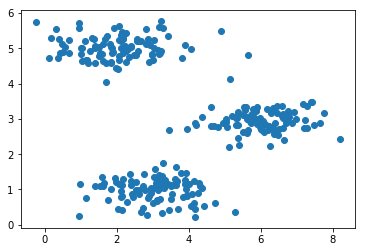

In [2]:
data = sio.loadmat('ex7data2.mat')
X = data['X']
plt.scatter(X[:,0],X[:,1])

In [6]:
class k_means:
    def __init__(self,X):
        self.colors = ['b','g','r','c','m','y','k','w']
        self.k = 0
        self.X = X
        self.m = self.X.shape[0]
        
    
    def randomly_init(self):
        self.choice = np.random.randint(0,self.m,(self.k,))
        self.c = self.X[self.choice,:]
        #print(self.c)

    
    
    def cost(self,idxs):
        J = 0
        for i in range(self.k):
            J += np.linalg.norm(self.X[idxs==i,:] - self.c[i,:])**2
        J /= self.m
        return J
        
    
    def assign_x(self):
        idxs = np.zeros((self.X.shape[0],),dtype=int)
        for i in range(idxs.shape[0]):
            idxs[i] = 0
            dist = np.linalg.norm(self.X[i,:] - self.c[0,:])
            for j in range(1,self.c.shape[0]):
                kdist = np.linalg.norm(self.X[i,:] - self.c[j,:])
                if kdist < dist:
                    dist = kdist
                    idxs[i] = j
        return idxs
                    
    def reset_centroids(self,idxs):
        centroids = np.zeros((self.k,self.X.shape[1]))
        for i in range(centroids.shape[0]):
            centroids[i,:] = X[idxs==i,:].mean(0)
        self.c = centroids
        
    def train(self,row,col,k,draw=True):
        self.k = k
        self.randomly_init()
        for i in range(row*col):
            idxs = self.assign_x()
            self.reset_centroids(idxs)
            if draw:
                plt.subplot(row,col,i+1)
                for j in range(self.k):
                    plt.scatter(self.X[idxs==j,0],self.X[idxs==j,1],color=self.colors[j],s=4)
                    plt.scatter(self.c[j,0],self.c[j,1],marker='x',color=self.colors[(j+1)%8],s=100)
        return self.cost(idxs)

In [7]:
k = k_means(X)

## 绘制Elbow曲线选择最优的k

In [8]:
clses = list(range(1,9))
lost = 10*np.ones(8)
for cls in clses:
    for i in range(10):
        cost = k.train(2,5,cls,False)
        if cost < lost[cls-1]:
            lost[cls-1] = cost

/home/luo3300612/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:39: RuntimeWarning: Mean of empty slice.
/home/luo3300612/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:73: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)


Text(0.5,1,'Elbow Curve')

/home/luo3300612/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


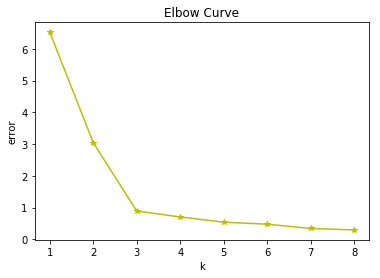

In [24]:
plt.plot(clses,lost,marker='*',c='y')
plt.xlabel(u'k')
plt.ylabel(u'error')
plt.title(u'Elbow Curve')

### k<3误差下降迅速，k>3时误差下降缓慢，故选择k=3

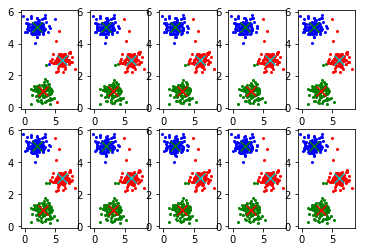

In [11]:
cost = k.train(2,5,3)